# CM50268 :: Final project

**Total Marks 25 (25% of overall unit grade).** 

*Submission deadline: 8pm, May 03, 2024. Please submit this file along with your individual report in Moodle*

## Submission & Marking

This exercise is assessed, and the marks will contribute to your final grade. For this exercise there are a number of places where you are expected to enter your own code. Please see the BML Final Project Specification document for details. 

Every place you have to add code is described in the text and specifically indicated by the comment:

`#### **** YOUR CODE HERE **** ####`


The workbook you submit must be this `.ipynb` file, which is saved into the directory you're running Jupyter; alternatively you can download it from the menu above using `File -> Download As -> Notebook (.ipynb)`. Remember to save your work regularly (Save and Checkpoint in the File menu, the icon of a floppy disk, or Ctrl-S); the version you submit should have all code blocks showing the results (if any) of execution below them.

**You should take care to avoid any suggestion of plagiarism in your submission.** There is helpful information on how to avoid plagiarism on the University website: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

# Project setup

This coursework involves the evaluation of Bayesian modelling methods on a real multivariate regression task. Please check the pdf file for the details of the project.

- <font color=Red> Please try to use fixed random seeds to make your results reproducible </font>

- <font color=Red> Please do NOT change the name of the fixed variables, as Task 2 - Task 5 of this coding exercises are auto-marked </font>

The marks for Task 1 will be awarded based only on the content of the report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

import hmc_Lab as hmc

# Task 1 : Exploratory analysis (Section 4.1 in the specification doc)

Undertake an initial exploratory analysis of the training data and summarise. Code in Task 1 will NOT by auto-marked. Results of Task 1 will be assessed along with your individual report, i.e., 4 marks in total. 

 - <font color=Red> Please perserve the variables `X_train` and  `y_train` representing the normalised data in numpy array, as required for the following exercises  </font>

 - `X_train` is an np.array with shape (384, 9). The 1st column is a constant (bias) $x_0$ and the 2nd to the 9th columns are data variables $x_1,x_2,\dots,x_8$

 - `y_train` is also an np.array with shape (384,), representing the target variable $y$ 
 
 -  Please utilize zero-mean normalization on `X_train`and <font color=Red>refrain</font> from applying any normalization technique to obtain `y_train`.
  

In [2]:
#### **** YOUR CODE HERE **** ####  
train_data = pd.read_csv('ee-train.csv')
test_data = pd.read_csv('ee-test.csv')
# Describe the training dataset
print("Training Dataset:")
print("Size:", train_data.shape)
print(train_data.describe())
print("Missing values per column:\n", train_data.isnull().sum())

# Describe the test dataset
print("\nTest Dataset:")
print("Size:", test_data.shape)
print(test_data.describe())
print("Missing values per column:\n", test_data.isnull().sum())
#### **** You can add extra cells to illustrate your results **** ####  

Training Dataset:
Size: (384, 10)
       const  Relative Compactness  Surface Area   Wall Area   Roof Area  \
count  384.0            384.000000    384.000000  384.000000  384.000000   
mean     1.0              0.771042    665.774740  318.180990  173.796875   
std      0.0              0.106553     88.196712   42.248972   44.852410   
min      1.0              0.620000    514.500000  245.000000  110.250000   
25%      1.0              0.690000    588.000000  294.000000  140.875000   
50%      1.0              0.760000    661.500000  318.500000  147.000000   
75%      1.0              0.860000    735.000000  343.000000  220.500000   
max      1.0              0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
count      384.000000   384.000000    384.000000                 384.000000   
mean         5.377604     3.536458      0.236849                   2.783854   
std          1.747619     1.097695      0.13

In [3]:

X_train = train_data.iloc[:, :-1]  # Exclude target variable
y_train = train_data['Heating Load'].values
X_test = test_data.iloc[:, :-1]
y_test = test_data['Heating Load'].values

train_mean = X_train.iloc[:, 1:].mean()
train_std = X_train.iloc[:, 1:].std()

X_train.iloc[:, 1:] = (X_train.iloc[:, 1:] - train_mean) / train_std

# Normalise test set with the mean and std of a train set because in the reality we don't know the distribution of a test set.
X_test.iloc[:, 1:] = (X_test.iloc[:, 1:] - train_mean) / train_std

X_train = X_train.values
X_test = X_test.values

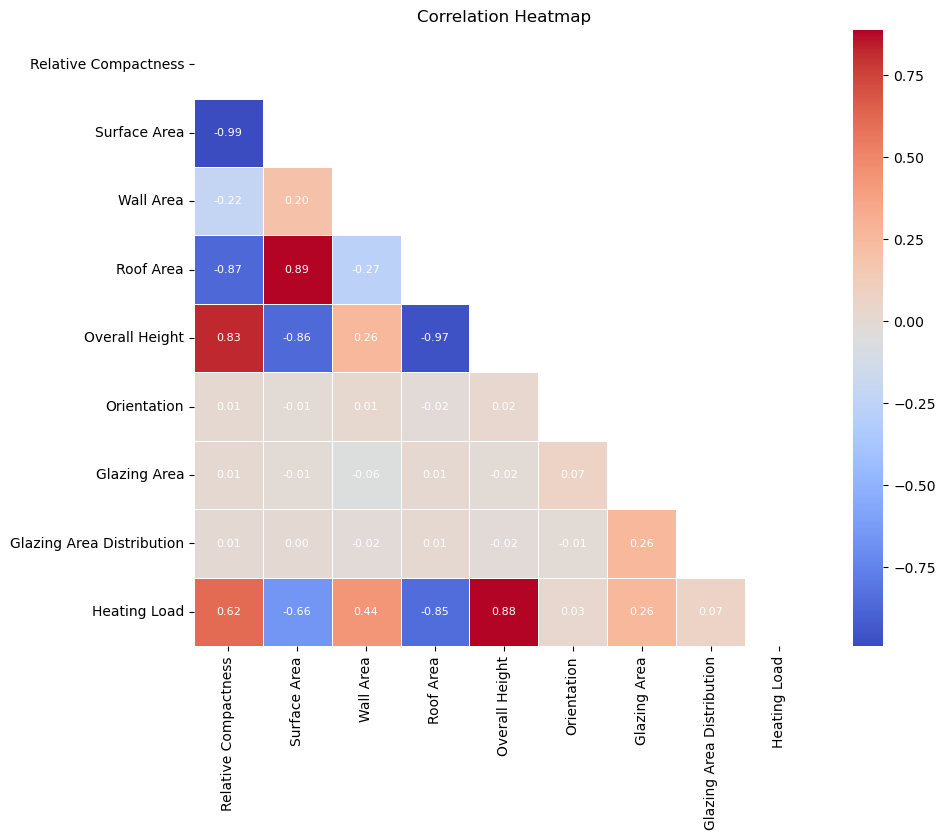

In [4]:
import numpy as np
import seaborn as sns

# Find the Correation between each variable
correlation_matrix = train_data.iloc[:, 1:].corr()

# Plot only a half of heatmap as it is parrallel
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='white', fontsize=8)

plt.title('Correlation Heatmap')
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


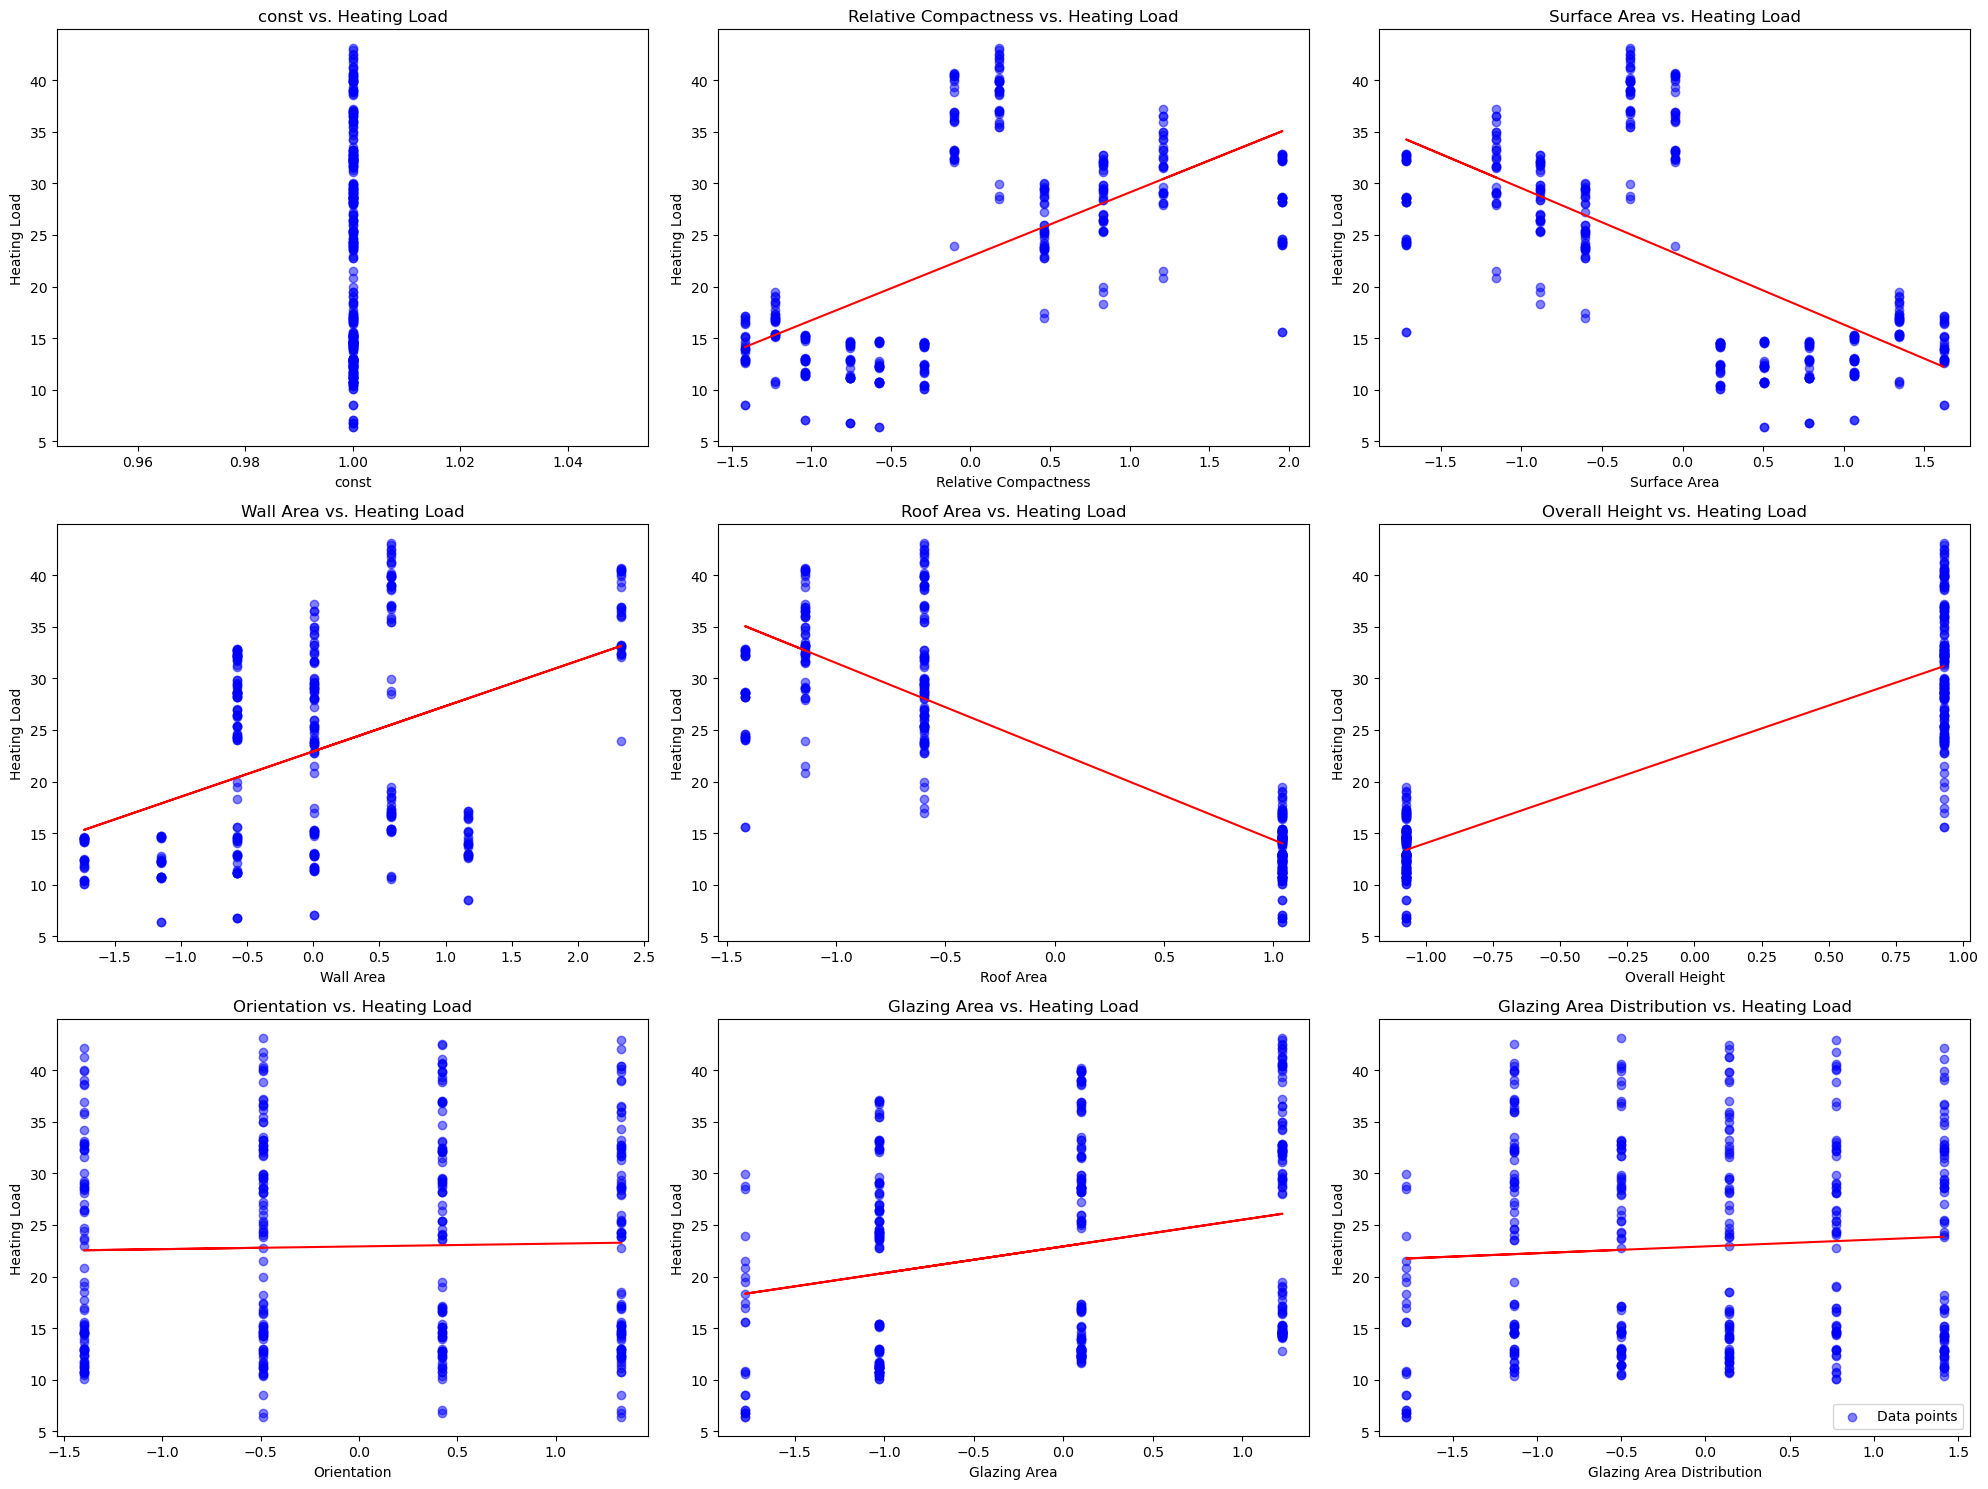

In [5]:
# Ploting scatter along with the linear to show the correration between Heating load and other variables
feature_names = train_data.columns[:-1]

features = X_train.shape[1] 

plt.figure(figsize=(20, 15)) 
for i in range(features):
    plt.subplot((features + 2) // 3, 3, i + 1)
    feature = X_train[:, i]
    target = y_train
    
    # Fit a line to the data
    coefficients = np.polyfit(feature, target, 1) 
    polynomial = np.poly1d(coefficients)
    line = polynomial(feature)
    
    # Plotting
    plt.scatter(feature, target, color='blue', alpha=0.5, label='Data points')
    plt.plot(feature, line, color='red', label='Fit line' if i == 0 else "")
    plt.xlabel(feature_names[i])
    plt.ylabel('Heating Load')
    plt.title(f'{feature_names[i]} vs. Heating Load')

plt.tight_layout()
plt.legend()
plt.savefig("linearity.png", dpi=300, bbox_inches='tight')
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MAE for training and test sets
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training MAE:", train_mae)
print("Test MAE:", test_mae)


Training MAE: 2.1608808910367885
Test MAE: 2.0304869415668096


In [7]:
# Check whether fixed variables are correctly defined ..
try:
    if not isinstance(X_train,np.ndarray):
        print('X_train should be an array')        
    if X_train.shape != (384,9):
        print('X_train is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(y_train,np.ndarray):
        print('y_train should be an array')        
    if y_train.shape != (384,):
        print('y_train is arranged in wrong shape')
    if y_train.mean()<10:
        print('Do not apply any normalization technique to obtain `y_train`')
except Exception as err:
    print('Error output:', err)

#  Task 2 : Type-2 maximum likelihood (Section 4.2 in the specification doc)

###  **(6 marks for coding part)**

Precisions are defined as: $\alpha = 1 / \sigma_w^2$ and $ \beta = 1 / \sigma_{\epsilon}^2 $

Assume priors of $\alpha$ and $\beta$ follow flat Uniform distributions, please derive a likelihood function $(y|\alpha, \beta)$ (`compute_log_marginal`) to compute the *log-ikelihood* for the Bayesian linear regression problem using $X$ and hyperparameters $\alpha$ and $\beta$. 

In Lecture 4, we have illustrated the equations of finding the most probable hyperparameters to maximise the likelihood with respect to the hyperparameters.


`X`: this is an np.array equivalent to matrix $X$ in the specification doc, e.g., `X_train`, `X_test`.

`y`: this is an np.array equivalent totarget $y$ in the specification doc, e.g., `y_train`, `y_test`.


In [8]:
## Compute log-likelihood

def compute_log_marginal(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####   
    N, M = X.shape
    
    covariance_matrix = 1 / beta * np.eye(N) + 1 / alph * np.dot(X, X.T)

    mean = np.zeros(N) 

    lgp = stats.multivariate_normal.logpdf(y, mean=mean, cov=covariance_matrix)
    return lgp

Compute log-evidence (marginal likelihood) `log_prob_y` and plot the 'contourf' of the log-posterior distribution.

- The x-axis should be the value of $log \alpha$ and y-axis the $log\beta$, `log_prob_y` represents the log-evidence. For each axis, it is recommended to use 
`np.linspace(-5,0,100)`

- It is strongly recommended that you use only natural logarithms for hyper-parameter scales. That is, you would use `numpy.exp()` and `numpy.log()` functions to convert (or to convert back) the logarithm terms, <font color=Red> which is different from the previous coursework Part2</font>.

In [9]:
#### **** YOUR CODE HERE **** ####   
# Random log(alpha) and log(beta)
log_alpha_values = np.linspace(-5, 0, 100)
log_beta_values = np.linspace(-5, 0, 100)

# turn from log scale into normal scale
alpha_values = np.exp(log_alpha_values)
beta_values = np.exp(log_beta_values)
log_prob_y = []

for beta_val in beta_values:
    log_prob_y_row = []
    for alpha_val in alpha_values:
        log_marginal_prob = compute_log_marginal(X_train, y_train, alpha_val, beta_val)
        log_prob_y_row.append(log_marginal_prob)
    log_prob_y.append(log_prob_y_row)

log_prob_y = np.array(log_prob_y)

# Check whether your variables are correctly defined ..
try:
    if not isinstance(log_prob_y,np.ndarray):
        print('log_prob_y should be an array')        
    if log_prob_y.shape != (100,100):
        print('log_prob_y is arranged in a wrong shape')
except Exception as err:
    print('Error output:', err)

Print out the most proboble values of the parameters $\alpha$ and $\beta$ and the corresponding log-likelihood value.

In [10]:
#### **** YOUR CODE HERE **** ####
# Finding the log_prob_y max value
max_log_prob_y = np.amax(log_prob_y)

# Finding the position
row, column = np.unravel_index(np.argmax(log_prob_y), log_prob_y.shape)


most_prob_alpha = alpha_values[column]
most_prob_beta = beta_values[row]

most_prob_logalpha = log_alpha_values[column]
most_prob_logbeta = log_beta_values[row]

print('Most probable alpha value:', round(most_prob_alpha, 5))
print('Most probable beta value:', round(most_prob_beta, 5))
print('Most probable log alpha value:', round(most_prob_logalpha, 5))
print('Most probable log beta value:', round(most_prob_logbeta, 5))
print('Their log probability:', max_log_prob_y)

Most probable alpha value: 0.01174
Most probable beta value: 0.10837
Most probable log alpha value: -4.44444
Most probable log beta value: -2.22222
Their log probability: -1001.4507356501001


Visualisation using `plt.contourf`for the posterior distribution and indicate the most probable value (with a highlighted marker) in the graph.

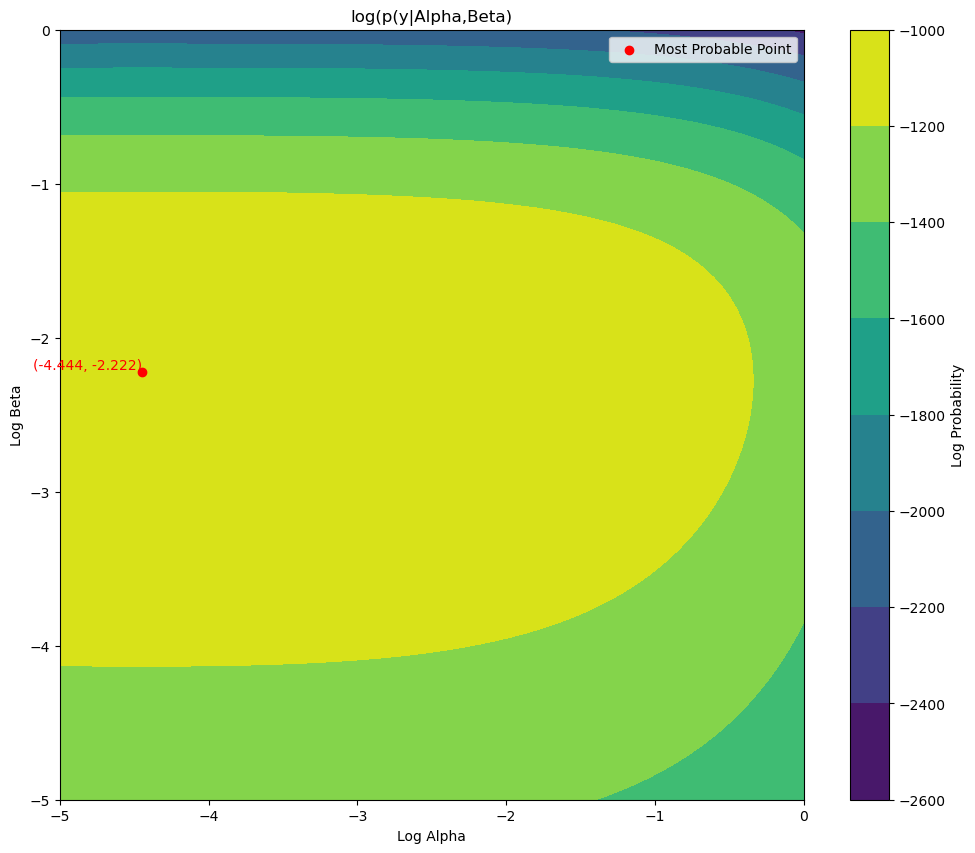

In [11]:
#### **** YOUR CODE HERE **** ####   
plt.figure(figsize=(12, 10))

contour = plt.contourf(log_alpha_values, log_beta_values, log_prob_y, cmap='viridis')
plt.colorbar(contour, label='Log Probability')

plt.scatter(most_prob_logalpha, most_prob_logbeta, color='red', marker='o', label='Most Probable Point')

plt.text(most_prob_logalpha, most_prob_logbeta, f'({round(most_prob_logalpha, 3)}, {round(most_prob_logbeta, 3)})',
         verticalalignment='bottom', horizontalalignment='right', color='red')

plt.xlabel('Log Alpha')
plt.ylabel('Log Beta')
plt.title('log(p(y|Alpha,Beta)')

plt.savefig('posterior_distribution.png', dpi=300)

plt.legend()

plt.show()

Write a function `compute_posterior(X, y, alph, beta)`  to compute the posterior mean $\mathbf{\mu}$ (`Mu`) and covariance $\mathbf{\Sigma}$ (`SIGMA`) for the Bayesian linear regression model, and return `Mu` and `SIGMA` for the posterior in the np.array format. 

In [12]:
def compute_posterior(X, y, alph, beta):
    #### **** YOUR CODE HERE **** ####
    I = np.identity(X.shape[1])
    Mu = np.dot(np.linalg.inv(np.dot(X.T,X) + 1/beta * alph * I), np.dot(X.T,y))
    SIGMA = np.dot(1/beta,np.linalg.inv(np.dot(X.T,X) + 1/beta * alph * I))
    return Mu, SIGMA

Calculate the predicted weights and print out the corresponding RMSE for training and test sets.

In [13]:
#### **** YOUR CODE HERE **** ####
from sklearn.metrics import mean_absolute_error, mean_squared_error

Mu, SIGMA = compute_posterior(X_train, y_train, most_prob_alpha, most_prob_beta)

# Making a prediction
y_train_pred = np.dot(X_train, Mu)
y_test_pred = np.dot(X_test, Mu)

# Finding MAE of the train set and the test set
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Finding RMSE of the train set and the test set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print("Training set MAE:", mae_train)
print("Test set MAE:", mae_test)
print("Training set RMSE:", rmse_train)
print("Test set RMSE:", rmse_test)

Training set MAE: 2.1301780265333394
Test set MAE: 2.0668363800291663
Training set RMSE: 3.0116952593212414
Test set RMSE: 2.8434352701633205


# Task 3: Verify HMC on a standard 2D Gaussian example (Section 4.3 in the specification doc)

###  **(4 marks for coding part)**

## The "Distribution"

Complete the following functions:

- `energy_func(x)`: the energy function, return negative log pdf value in float format
- `energy_grad(x)`: the gradient function returns a numpy array containing the partial derivatives of the energy function with respect to the parameters/hyper-parameters.
- `covar`: Covariance matrix for 2-dimensional gaussian. It is an numpy array with shape (2,2), e.g,  np.array([[1.0875,1],[1,1.0875]]) 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`



In [14]:

def energy_func(x, covar):
    #### **** YOUR CODE HERE **** ####
    rv = stats.multivariate_normal(mean=np.zeros(len(x)), cov=covar)
    neglgp = -rv.logpdf(x)
    
    return neglgp

def energy_grad(x, covar):
    #### **** YOUR CODE HERE **** ####
    inv_covar = np.linalg.inv(covar)
    g = np.dot(inv_covar, x)
    
    return g



## Visualising the Distribution
Before we run the sampler, let's visualise the distribution over an appropriate
grid of values. Please specify `covar` to plot figures, an naive example of `covar` has been shown below

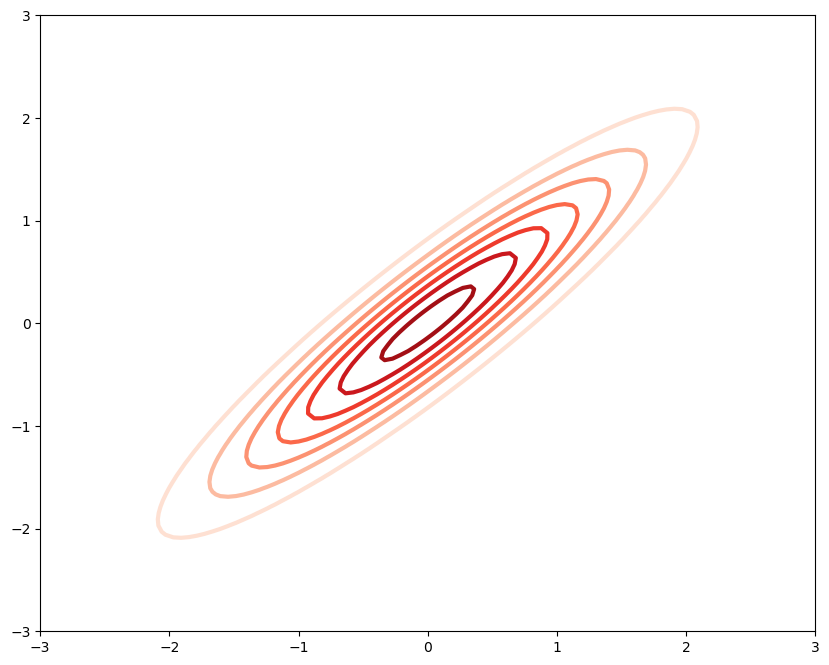

In [15]:

#### **** YOUR CODE BELOW **** ####

covar = np.array([[1.0875,1],[1,1.0875]]) 

#### **** YOUR CODE ABOVE **** ####

f = 5  # The "frequency" argument for the energy, used here to demonstrate how to use "args"
# Other plotting parameters
fsz = (10,8)
gsz = 100
lim = 3

# Setup the mesh grid

gx = np.linspace(-lim, lim, gsz)
GX, GY = np.meshgrid(gx, gx)
Gsz = GX.size
G = np.hstack((GX.reshape((Gsz, 1)), GY.reshape((Gsz, 1))))

# Plot the figure
plt.figure(figsize=fsz)
P = np.asarray([np.exp(-energy_func(g, covar)) for g in G])
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

In [16]:
try:
    if not isinstance(covar ,np.ndarray):
        print('covar  should be an array')        
    if covar .shape != (2,2):
        print('covar  is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)

In [17]:
# Initialise the state for the first time step
x0 = np.random.normal(size=2)

# Call the function from the pre-defined hmc module
hmc.gradient_check(x0, energy_func, energy_grad, covar)

Calc.         Numeric       Delta         Acc.
    -3.01349      -3.01349  -1.060787e-10  11
      2.9126        2.9126  -1.373999e-10  11


## Hyper-parameters

Please tune optimal hyper-parameters incluidng `R`, `L`, and `eps` in the cell below. 

Calc.         Numeric       Delta         Acc.
    -3.01349      -3.01349  -1.060787e-10  11
      2.9126        2.9126  -1.373999e-10  11
|----------|  0% accepted [ 3 secs to go ]
|#---------| 90% accepted [ 2 secs to go ]
|##--------| 90% accepted [ 2 secs to go ]
|###-------| 90% accepted [ 2 secs to go ]
|####------| 90% accepted [ 2 secs to go ]
|#####-----| 90% accepted [ 1 secs to go ]
|######----| 90% accepted [ 1 secs to go ]
|#######---| 90% accepted [ 1 secs to go ]
|########--| 90% accepted [ 1 secs to go ]
|#########-| 90% accepted [ 0 secs to go ]
|##########| 90% accepted [ 0 secs to go ]
HMC: R=10000 / L=25 / eps=0.36 / Accept=90.3%


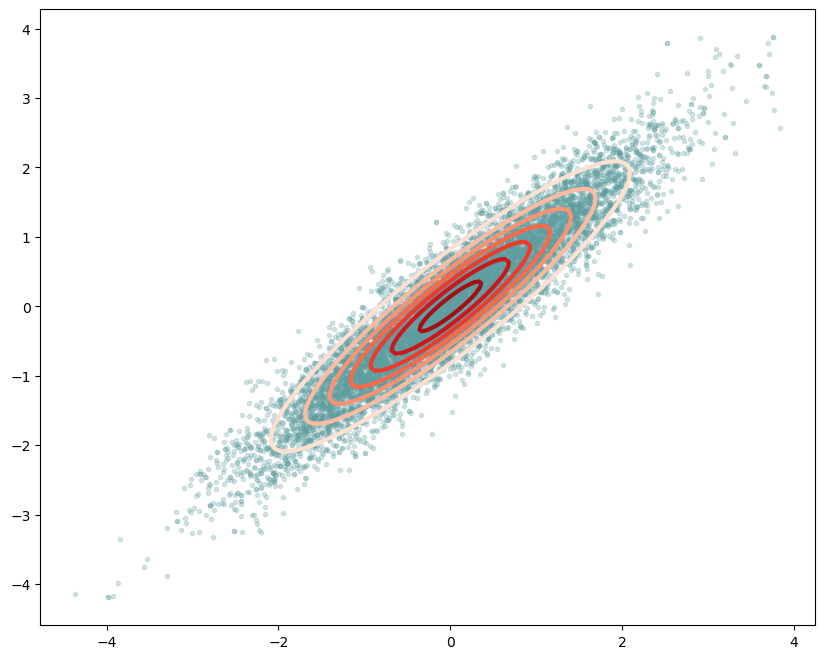

In [18]:
np.random.seed(seed=1)  # Fix the random seed for better reproducibility

#### **** YOUR CODE BELOW **** ####


R = 10000
L = 25  
eps = 0.36 
burn = R // 10  

#### **** YOUR CODE ABOVE **** ####

# HMC sampling
S, *_ = hmc.sample(x0, energy_func, energy_grad, R, L, eps, burn=burn, checkgrad=True, args=[covar])
# Plot the figure
plt.figure(figsize=fsz)
plt.plot(S[:, 0], S[:, 1], '.', ms=6, color='CadetBlue', alpha=0.25, zorder=0)
plt.contour(GX, GY, P.reshape((gsz, gsz)), cmap='Reds', linewidths=3, zorder=1);

/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


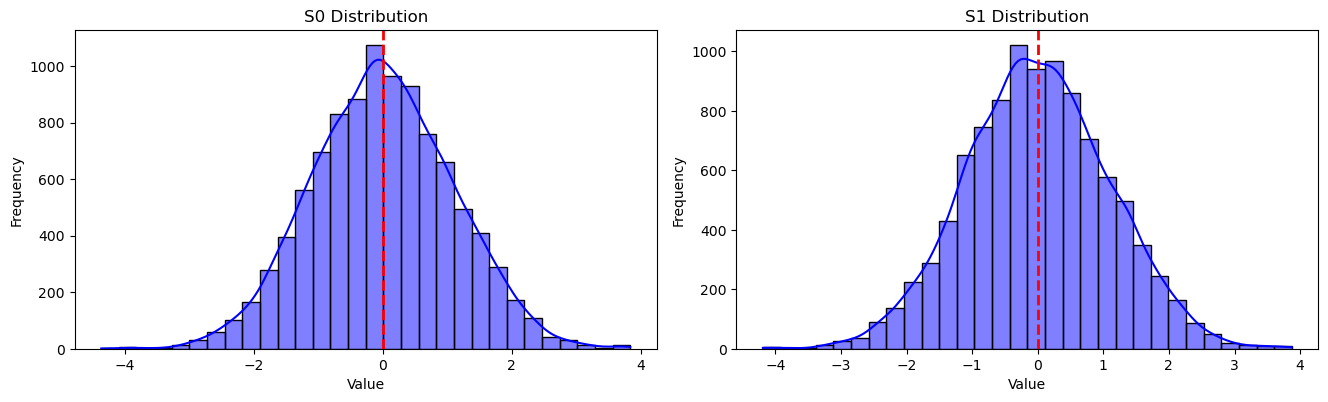

Mean of S0: 0.0011111955388505496
Mean of S1: -0.001465796943176866


In [19]:
#### **** YOUR CODE HERE **** ####
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mean_values = []

plt.figure(figsize=(20, 15))

dim_labels = ['S0', 'S1'] + [f'W{i+1}' for i in range(2)]

for i in range(2):
    plt.subplot(4, 3, i + 1)  
    mean_val = np.mean(S[:, i])
    mean_values.append(mean_val)
    sns.histplot(S[:, i], bins=30, kde=True, color='blue')
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)
    plt.title(f'{dim_labels[i]} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('HMC(3)_weigts_distribution.png')

plt.show()

for label, value in zip(dim_labels, mean_values):
    print(f'Mean of {label}: {value}')
#### **** You can add extra figures to support the individual report **** ####

# Task 4: Apply HMC to the Linear Regression Model (Section 4.4 in the specification doc)

###  **(6 marks for coding part)**

Complete the functions and the HMC code for this task:

- `energy_func_lr(hps, x, y)`: where `hps` is a 2+9 dimension array, where the 1st dimension represents $\alpha$, and the 2nd represnets $\beta$. Thus, `hps[0]` should be the current $\alpha$, `hps[1]` the $\beta$ and `hps[2:]` represent the weights `w` for constant and 8 variables respectively. `x` and `y` is the x and y array of training data.

- `energy_grad_lr(hps, x, y)`: the gradient function returns an array containing the partial derivatives of the energy function. should be the same shape for hps. 

- `R`: the number of samples desired
- `L`: number of simulation steps; for this simple case, 20 is easily enough
- `eps`: simulation step length; set by trial-and-error to give approx. 90% acceptance
- `burn`: simply set to `R/10`
- `checkgrad`: set to true to test the consistency of `energy_func` and `energy_grad`




In [20]:
def energy_func_lr(hps, x, y):
    #### **** YOUR CODE HERE **** ####
    alpha = np.exp(hps[0]) 
    beta = np.exp(hps[1])  
    w = hps[2:]            
    # Predictions
    y_pred = np.dot(x, w)
    neg_log_prior = 0.5*len(w) * np.log(2 * np.pi / alpha) + 0.5 * alpha *np.sum(w ** 2) 
    neg_log_likelihood = len(y)* 0.5 *np.log(2 * np.pi / beta) + 0.5 *beta * np.sum((y - y_pred) ** 2)

    neglgp = neg_log_prior + neg_log_likelihood
    return neglgp

In [21]:
def energy_grad_lr(hps, x, y):
    
    #### **** YOUR CODE HERE **** ####
    alpha = np.exp(hps[0]) 
    beta = np.exp(hps[1])  
    w = hps[2:]     

    y_pred = np.dot(x, w)
    residuals = y - y_pred

    grad_neg_log_prior = alpha * w
    
    grad_neg_log_likelihood = (-beta * np.dot(x.T, residuals))
   
    grad_w = grad_neg_log_prior + grad_neg_log_likelihood

    grad_alpha = (0.5 * (np.sum(w**2) -len(w) / alpha))* alpha
    grad_beta = (0.5 * (np.sum(residuals**2) - len(y) / beta))* beta
    g = np.concatenate(([grad_alpha], [grad_beta], grad_w))
    return g

In [22]:
np.random.seed(seed=1) 

#### **** YOUR CODE HERE **** ####
R = 10000
L = 20
eps = 0.08
burn = R // 10 

Y_train = y_train

# I initialsed based on the optimal values that i got from the question 2 because this method can help HMC 
# to find the optimal parameters more accurate
x0 = np.concatenate(([-4, -2],np.array([22.9, -6.9, -3.7,  0.8, -4.0, 7.3, -0.1,  2.8,  0.2])))


#### you can adjust the hpyer-parameters. 


S, *_ = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, Y_train])

Calc.         Numeric       Delta         Acc.
     1.57649       1.57649  -3.723116e-09   9
     43.8348       43.8348   1.106321e-08  10
   -0.656487     -0.656487   1.119584e-07   7
    -2.49739      -2.49739  -5.923992e-09   9
     2.54144       2.54144   6.621109e-08   8
    -1.19076      -1.19076  -4.450346e-08   8
      3.0598        3.0598  -1.013520e-08   9
    -3.00844      -3.00844  -1.308246e-07   8
     1.39786       1.39786  -5.201325e-08   8
     1.42231       1.42231  -1.176978e-08   9
    0.209579      0.209579  -7.587096e-08   7
|----------|  0% accepted [ 3 secs to go ]
|#---------| 86% accepted [ 3 secs to go ]
|##--------| 87% accepted [ 2 secs to go ]
|###-------| 87% accepted [ 2 secs to go ]
|####------| 87% accepted [ 2 secs to go ]
|#####-----| 87% accepted [ 1 secs to go ]
|######----| 87% accepted [ 1 secs to go ]
|#######---| 87% accepted [ 1 secs to go ]
|########--| 87% accepted [ 1 secs to go ]
|#########-| 87% accepted [ 0 secs to go ]
|##########| 87% 

## Print out the RMSE and plot figures for your report

Training set MAE: 2.1291869527883813
Test set MAE: 2.0660994351896718
Training set RMSE: 3.0116788911155585
Test set RMSE: 2.843067439876183


/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

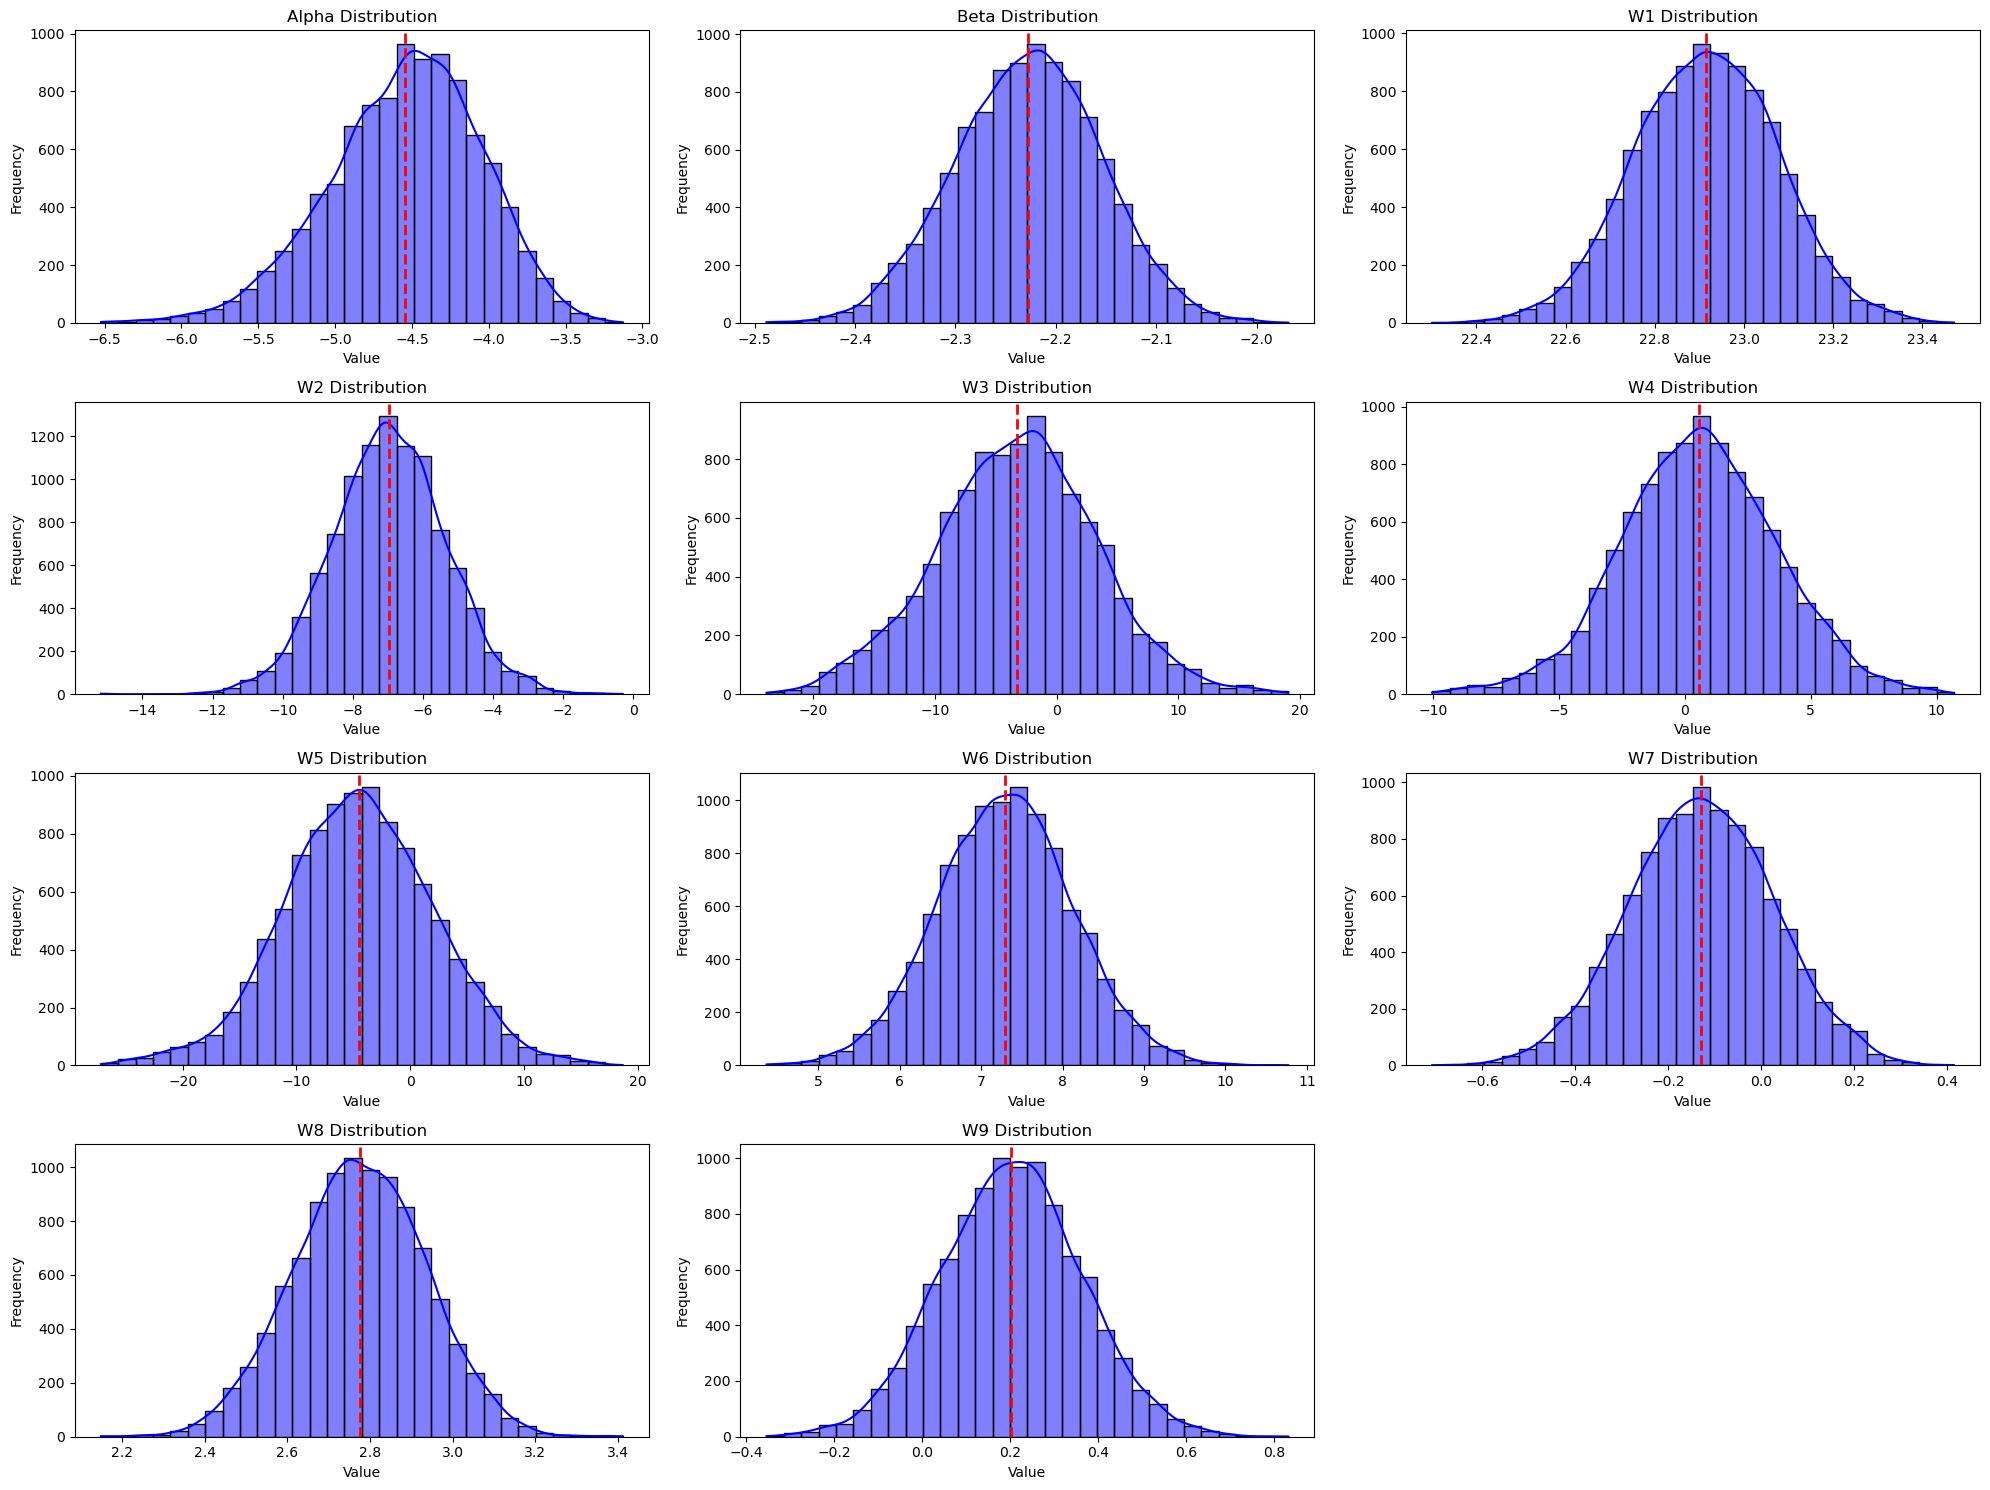

Mean of Alpha: -4.543018972841719
Mean of Beta: -2.2273469454036428
Mean of W1: 22.91545850725632
Mean of W2: -6.962281424607965
Mean of W3: -3.289213388790482
Mean of W4: 0.574337418918749
Mean of W5: -4.541503396606725
Mean of W6: 7.297636267981122
Mean of W7: -0.12796107053647685
Mean of W8: 2.7752607979268573
Mean of W9: 0.2031718700951745


In [23]:
#### **** YOUR CODE HERE **** ####
def predict(x, weights):
    return np.dot(x, weights)

train_predictions = [predict(X_train, s[2:]) for s in S]
test_predictions = [predict(X_test, s[2:]) for s in S]

mean_train_predictions = np.mean(train_predictions, axis=0)
mean_test_predictions = np.mean(test_predictions, axis=0)

train_mae = mean_absolute_error(y_train, mean_train_predictions)
test_mae = mean_absolute_error(y_test, mean_test_predictions)

train_rmse = np.sqrt(mean_squared_error(y_train, mean_train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test, mean_test_predictions))

print("Training set MAE:", train_mae)
print("Test set MAE:", test_mae)

print("Training set RMSE:", train_rmse)
print("Test set RMSE:", test_rmse)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize a list to store mean values
mean_values = []

plt.figure(figsize=(20, 15))

dim_labels = ['Alpha', 'Beta'] + [f'W{i+1}' for i in range(9)]

for i in range(11): 
    plt.subplot(4, 3, i + 1) 

    mean_val = np.mean(S[:, i])
    mean_values.append(mean_val)

    sns.histplot(S[:, i], bins=30, kde=True, color='blue')

    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)

    plt.title(f'{dim_labels[i]} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('HMC(4)_weights_distribution.png', dpi=300)
# Show the plots
plt.show()

# Display the mean values for each dimension
for label, value in zip(dim_labels, mean_values):
    print(f'Mean of {label}: {value}')


# Task 5: Apply HMC as a Classifier (Section 4.5 in the specification doc)

###  **(5 marks for the coding part)**

There's no restriction on the classifier implementation, please follow the instricution/hints in the specification document. You may receive 1 extra bonus mark depending on the quality of implementation.  


    
    


In [24]:
import pandas as pd
import numpy as np

X_train = train_data.iloc[:, :-1]
y_train = (train_data['Heating Load'] > 23).astype(int).values
X_test = test_data.iloc[:, :-1]
y_test = (test_data['Heating Load'] > 23).astype(int).values



train_mean = X_train.iloc[:, 1:].mean()
train_std = X_train.iloc[:, 1:].std()

X_train.iloc[:, 1:] = (X_train.iloc[:, 1:] - train_mean) / train_std

X_test.iloc[:, 1:] = (X_test.iloc[:, 1:] - train_mean) / train_std
X_train = X_train.values
X_test = X_test.values




In [25]:
import numpy as np
from scipy.special import expit 

def energy_func_lr(hps, x, y):
    alpha = np.exp(hps[0]) 
    w = hps[1:]
    logits = np.dot(x, w)
    # Sigmoid function
    y_pred = expit(logits) 

    # I used the same prior (Gaussian distribution) as i used in the question 4
    neg_log_prior = 0.5*len(w) * np.log(2 * np.pi / alpha) + 0.5 * alpha *np.sum(w ** 2) 

    # Bernoulli Distribution
    neg_log_likelihood = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


    neg_log_posterior = neg_log_prior + neg_log_likelihood

    return neg_log_posterior

def energy_grad_lr(hps, x, y):
    alpha = np.exp(hps[0])  
    w = hps[1:]
    logits = np.dot(x, w)
    y_pred = expit(logits)
    residuals = y_pred - y  

    grad_neg_log_prior = alpha * w
    grad_neg_log_likelihood = np.dot(x.T, residuals)

    grad_w = grad_neg_log_prior + grad_neg_log_likelihood
    grad_alpha = 0.5 * (np.sum(w**2) - len(w) / alpha)* alpha


    return np.concatenate(([grad_alpha], grad_w))


In [26]:

np.random.seed(1)


R = 10000 
L = 20   
eps = 0.17
burn = R//10  


x0 = np.random.normal(size=1 + X_train.shape[1])


S, *_ = hmc.sample(x0, energy_func_lr, energy_grad_lr, R, L, eps, burn=burn, checkgrad=True, args=[X_train, y_train])


Calc.         Numeric       Delta         Acc.
     25.0326       25.0326   5.240558e-09  10
   -0.156005     -0.156005   4.439256e-09   8
    0.632124      0.632124   1.681159e-08   8
     -8.2316       -8.2316   1.949170e-08   9
     3.05835       3.05835  -1.470630e-08   9
    -13.7917      -13.7917   5.088410e-08   9
     9.66502       9.66502  -8.722917e-09  10
    -14.1682      -14.1682  -2.167609e-08   9
    -15.3266      -15.3266   3.243535e-09  10
    -18.0012      -18.0012  -1.383138e-08  10


/var/folders/09/541wm2pd45g8knrnkz24_3y80000gn/T/ipykernel_8182/922607349.py:15: RuntimeWarning: divide by zero encountered in log
  neg_log_likelihood = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/var/folders/09/541wm2pd45g8knrnkz24_3y80000gn/T/ipykernel_8182/922607349.py:15: RuntimeWarning: invalid value encountered in multiply
  neg_log_likelihood = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


|----------|  0% accepted [ 3 secs to go ]
|#---------| 89% accepted [ 2 secs to go ]
|##--------| 90% accepted [ 2 secs to go ]
|###-------| 90% accepted [ 2 secs to go ]
|####------| 90% accepted [ 2 secs to go ]
|#####-----| 91% accepted [ 1 secs to go ]
|######----| 91% accepted [ 1 secs to go ]
|#######---| 91% accepted [ 1 secs to go ]
|########--| 91% accepted [ 1 secs to go ]
|#########-| 91% accepted [ 0 secs to go ]
|##########| 91% accepted [ 0 secs to go ]
HMC: R=10000 / L=20 / eps=0.17 / Accept=90.9%


In [27]:
def predict_logistic(x, weights):
    logits = np.dot(x, weights)
    # Set threshold 
    return expit(logits) >= 0.5 

# Excluding S[:,1:] as it is the alpha value
y_pred_train = predict_logistic(X_train, np.mean(S[:, 1:], axis=0))
y_pred_test = predict_logistic(X_test, np.mean(S[:, 1:], axis=0))

train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 98.70%
Test Accuracy: 99.22%


/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sarutsunpawatr/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

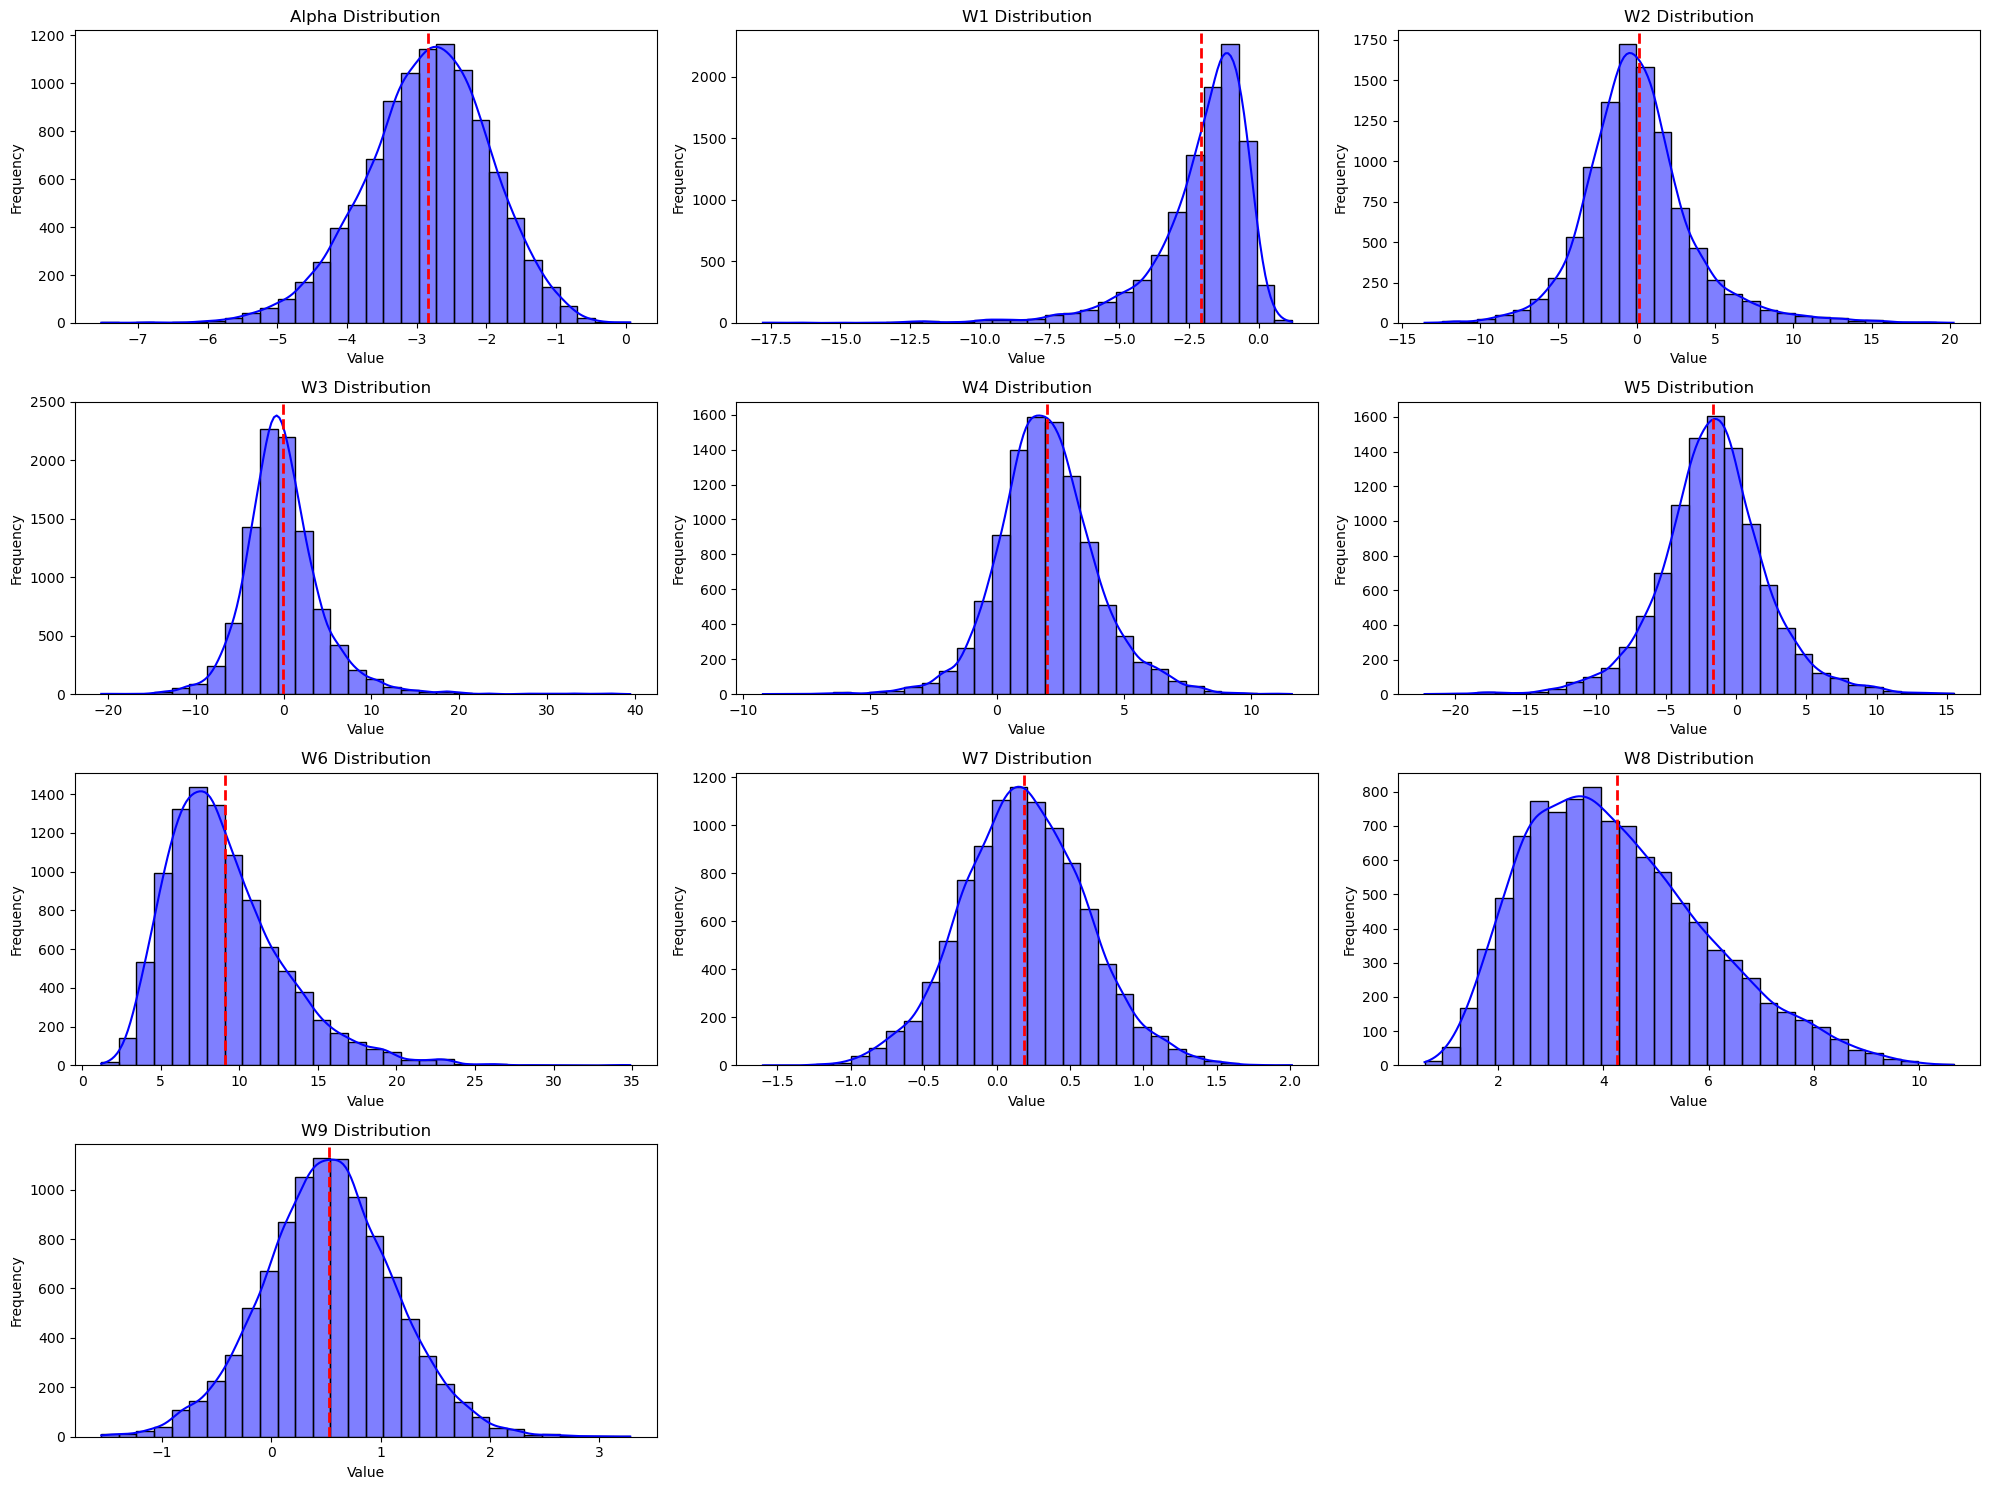

Mean of Alpha: -2.8447769146452737
Mean of W1: -2.0560683179207104
Mean of W2: 0.11276891495631483
Mean of W3: -0.016583389847137003
Mean of W4: 1.9631395845463517
Mean of W5: -1.6403579661806142
Mean of W6: 9.064103391101927
Mean of W7: 0.18763273358018884
Mean of W8: 4.264358852514484
Mean of W9: 0.5289465619094141


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Storing mean of each variables
mean_values = []

plt.figure(figsize=(20, 15))


dim_labels = ['Alpha'] + [f'W{i+1}' for i in range(9)]

for i in range(10): 
    plt.subplot(4, 3, i + 1)  

    mean_val = np.mean(S[:, i])
    mean_values.append(mean_val)


    sns.histplot(S[:, i], bins=30, kde=True, color='blue')


    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2)

    plt.title(f'{dim_labels[i]} Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('weigts_distribution.png', dpi=300)
plt.show()

# Display the mean values for each dimension
for label, value in zip(dim_labels, mean_values):
    print(f'Mean of {label}: {value}')


# Task 6: Variational Inference (Section 4.6 in the specification doc)

###  **(4 marks for coding part)**

Write a Variational Inference function `VI(X_train, Y_train)` and return parameter estimates. 

The returned terms should include:

`an`, `bn`, `cn`, `dn`: float

`mn_n`: np.array, shape = (9,),

`sig_n`: np.array, shape = (9,9),

where

`an` and `bn` are the hyper-parameters for $w\propto  N(w|0,\alpha)$,  $\alpha\propto Gamma(\alpha|a,b) $. 

`cn` and `dn` are the hyper-parameters for gaussian noise $N(0,\beta)$,  $\beta\propto Gamma(\beta|c,d) $.

`mn_n` and `sig_n` are the mean $\mathbf{\mu}$ and covariance $\mathbf{\Sigma}$ of the posterior distribution w.r.t. $w$ (in this task) for the Bayesian linear regression model.

<font color=Red> The corresponding derivations should be completed in your report.</font>



In [29]:
def VI(X_train, Y_train):
    #### **** YOUR CODE HERE **** ####
    N, D = X_train.shape

    # set the intial values arbitrary (I used the values that show in the lecture.)
    a0 = 1e-4
    b0 = 1e-4
    c0 = 1e-4
    d0 = 1e-4
    an,bn,cn,dn = a0,b0,c0,d0

    mu_n = np.zeros(D)
    sig_n = np.eye(D)

    for _ in range(1000):
        Precision_mat = (an / bn) * np.eye(D) + cn / dn * np.dot(X_train.T, X_train)
        sig_n = np.linalg.inv(Precision_mat)
        mu_n = np.dot(np.dot(sig_n, X_train.T), Y_train)  * (cn / dn)

        # update the shape and rate values of the alpha (gamma distribution)
        an = a0 + D / 2
        bn = b0 + 0.5 * (np.dot(mu_n.T, mu_n) + np.trace(sig_n)) 
        # update the shape and rate values of the beta (gamma distribution)
        cn = c0 + N / 2
        dn = d0 + 0.5 * np.sum((Y_train - np.dot(X_train, mu_n))**2)
    
    
    return an,bn,cn,dn, mu_n, sig_n


Print out the expectation of $\alpha$ and $\beta$ as `exp_alpha`,`exp_beta`. 

In [30]:
try:
    an,bn,cn,dn, mu_n, sig_n = VI(X_train, Y_train)
except Exception as err:
    print('Error output:', err)
    
#### Print out the expectation of alpha and beta
#### **** YOUR CODE HERE **** ####
exp_alpha = an / bn
exp_beta = cn / dn

print(f"Expected alpha: {exp_alpha}")
print(f"Expected beta: {exp_beta}")

Expected alpha: 0.011917838850588915
Expected beta: 0.11024993575316222


In [31]:
# Check whether your variables are correctly defined  ..
try:
    if not isinstance(mu_n,np.ndarray):
        print('mu_n should be an array')        
    if mu_n.shape != (9,):
        print('mu_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    if not isinstance(sig_n,np.ndarray):
        print('sig_n should be an array')        
    if sig_n.shape != (9,9):
        print('sig_n is arranged in wrong shape')
except Exception as err:
    print('Error output:', err)
    
try:
    exp_alpha
    exp_beta
except Exception as err:
    print('Error output:', err)

Calculate the RMSE for training and test sets.

In [32]:
#### **** YOUR CODE HERE **** ####
mu_n, sig_n = compute_posterior(X_train, y_train, exp_alpha, exp_beta)

# Making predictions
y_train_pred = np.dot(X_train, mu_n)
y_test_pred = np.dot(X_test, mu_n)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)


rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Training set MAE:", train_mae)
print("Test set MAE:", test_mae)

print("Training set RMSE:", train_rmse)
print("Test set RMSE:", test_rmse)

Training set MAE: 2.1291869527883813
Test set MAE: 2.0660994351896718
Training set RMSE: 3.0116788911155585
Test set RMSE: 2.843067439876183
